[bouda](https://medium.com/100-days-of-algorithms/day-97-locally-weighted-regression-c9cfaff087fb)

In [1]:
%matplotlib inline

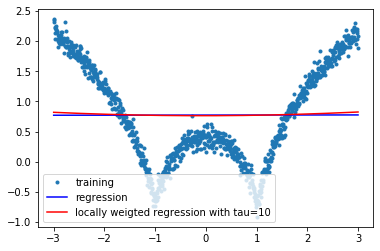

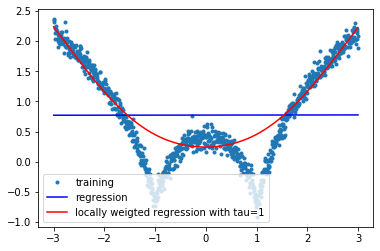

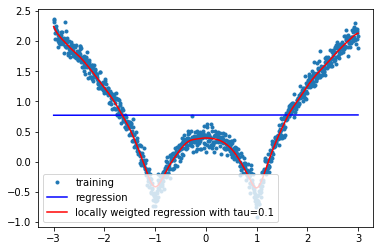

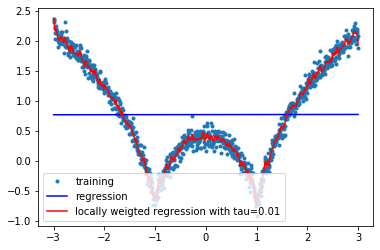

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la

seed = 123456789
np.random.seed(seed)

    
" generate data "
N = 1000
x = np.linspace(-3, 3, num=N)
y = np.log(np.abs(x**2-1) + 0.5) + np.random.normal(scale=.1, size=N) 

" linear regression "
A = np.array([np.ones(N),x]).T
theta = la.inv(A.T @ A) @ A.T @ y 
y_pred = A@theta


def generate_y(x, theta, inc_ran=True, mu=0, sigma=0.2): 
    y = 0
    for i in range(len(theta)): 
        y += theta[i]*(x**i)
    if inc_ran: 
        return y + np.random.normal(mu, sigma, x.shape)
    else: 
        return y


def get_weights(x,x_i,tau=1): 
    return np.exp(-(x_i-x)**2/(2*tau**2))


def lwr(x_, x, y, A, tau=1):
    N = A.shape[0]
    W = np.zeros((N,N))
    for i in range(N): 
        W[i,i] = get_weights(x_,x[i],tau=tau)    
    theta = la.inv(A.T@W@A)@A.T@W@y 
    return generate_y(x_,theta,inc_ran=False)

" locally weighted linear regression tau=10 "
y_pred_lwr = [lwr(x_, x, y, A, tau=10) for x_ in x] 
plt.plot(x,y,'.')
plt.plot(x,y_pred,c='b')
plt.plot(x,y_pred_lwr,c='r')
plt.legend(('training','regression', 'locally weigted regression with tau=10'),loc='lower left')
plt.show()

" locally weighted linear regression tau=1 "
y_pred_lwr = [lwr(x_, x, y, A, tau=1) for x_ in x]  
plt.plot(x,y,'.')
plt.plot(x,y_pred,c='b')
plt.plot(x,y_pred_lwr,c='r')
plt.legend(('training','regression', 'locally weigted regression with tau=1'),loc='lower left')
plt.show()

" locally weighted linear regression tau=0.1 "
y_pred_lwr = [lwr(x_, x, y, A, tau=0.1) for x_ in x]  
plt.plot(x,y,'.')
plt.plot(x,y_pred,c='b')
plt.plot(x,y_pred_lwr,c='r')
plt.legend(('training','regression', 'locally weigted regression with tau=0.1'),loc='lower left')
plt.show()

" locally weighted linear regression tau=0.01 "
y_pred_lwr = [lwr(x_, x, y, A, tau=0.01) for x_ in x]  
plt.plot(x,y,'.')
plt.plot(x,y_pred,c='b')
plt.plot(x,y_pred_lwr,c='r')
plt.legend(('training','regression', 'locally weigted regression with tau=0.01'),loc='lower left')
plt.show()

In [3]:
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

output_notebook()


def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    A = np.c_[np.ones(len(X)), X]
    
    # fit model: normal equations with kernel
    AT = A.T * radial_kernel(x0, A, tau)
#     print(A.T.shape)
#     print(radial_kernel(x0, A, tau).shape)
#     print(AT.shape)
    theta = np.linalg.pinv(AT @ A) @ AT @ Y
    
    # predict value
    return x0 @ theta


def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X-x0)**2, axis=1) / (-2*tau**2))


n = 1000

# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.log(np.abs(X ** 2 - 1) + .5)

# jitter X
X += np.random.normal(scale=.1, size=n)


def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]

    plot = figure(plot_width=300, plot_height=300)
    plot.title.text = 'tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    
    return plot


show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))

Loading BokehJS ...

In [4]:
def interactive_update(tau):
    model.data_source.data['y'] = [local_regression(x0, X, Y, tau) for x0 in domain]
    push_notebook()

    
domain = np.linspace(-3, 3, num=100)
prediction = [local_regression(x0, X, Y, 1.) for x0 in domain]

plot = figure()
plot.scatter(X, Y, alpha=.3)
model = plot.line(domain, prediction, line_width=2, color='red')
show(plot, notebook_handle=True)

interact(interactive_update, tau=(0.001, 3., 0.001))

interactive(children=(FloatSlider(value=1.5, description='tau', max=3.0, min=0.001, step=0.001), Output()), _d…

<function __main__.interactive_update(tau)>